In [29]:
from __future__ import print_function
import numpy as np
np.random.seed(0)
import os, glob
import time
import argparse

import matplotlib.pyplot as plt
import ROOT

In [44]:
# Load IMG ntuples as main TTree
#img_list = 'Era2017_17Dec2020_CLUSv1_data2017-Run2017B_trunc.txt'
#print('Opening img input list:',img_list)
#img_inputs = []
#with open(img_list, 'r') as img_file:
#    for img_input in img_file:
#        img_inputs.append(img_input[:-1])
eos_basedir = 'root://cmseos.fnal.gov//store/user/lpchaa4g/mandrews/2017/Era2017_15Mar2021_CLUSv1/skim/ep90'
img_inputs = [
    #'h4g2017-mA1p0GeV_mantuple.root'
    #'h4g2017-mA0p4GeV_mantuple.root'
    #'h4g2017-mA0p2GeV_mantuple.root'
    #'h4g2017-mA0p1GeV_mantuple.root'
    'bg2017-hgg_mantuple.root'
    #'data2017-Run2017B_trunc_mantuple.root'
    #'data2017-Run2017B_mantuple.root',
    #'data2017-Run2017C_mantuple.root',
    #'data2017-Run2017D_mantuple.root',
    #'data2017-Run2017E_mantuple.root',
    #'data2017-Run2017F_mantuple.root',
]
print(img_inputs[0])
print('len(img_inputs):',len(img_inputs))
assert len(img_inputs) > 0

print('Setting IMG as main TTree')
print('N IMG files:',len(img_inputs))
print('IMG file[0]:',img_inputs[0])
tree = ROOT.TChain("mantuple")
for fi in img_inputs:
    fname = '%s/%s'%(eos_basedir,fi)
    #fname = './%s'%fi
    print(fname)
    tree.Add(fname)
    #break
nEvts = tree.GetEntries()
print('N evts in IMG ntuple:',nEvts)

bg2017-hgg_mantuple.root
len(img_inputs): 1
Setting IMG as main TTree
N IMG files: 1
IMG file[0]: bg2017-hgg_mantuple.root
root://cmseos.fnal.gov//store/user/lpchaa4g/mandrews/2017/Era2017_15Mar2021_CLUSv1/skim/ep90/bg2017-hgg_mantuple.root
N evts in IMG ntuple: 381716


In [31]:
'''eb_scale = 25.
m0_scale = 1.6
def transform_y(y):
    return y/m0_scale
def inv_transform(y):
    return y*m0_scale
def shapeEB(eb):
    return np.array(eb).reshape(1,170,360)
'''
def make_pdf(h):

    sumOverY = {}
    for ix in range(1, h.GetNbinsX()+1):
        sumOverY[ix] = sum([h.GetBinContent(ix, iy_) for iy_ in range(1, h.GetNbinsY()+1)])
        for iy in range(1, h.GetNbinsY()+1):
            binc = h.GetBinContent(ix, iy)
            if sumOverY[ix] > 0.:
                h.SetBinContent(ix, iy, binc/sumOverY[ix])

    return h

def set_hist(h, c, xtitle, ytitle, htitle):
    #c.SetLeftMargin(0.14)
    #c.SetRightMargin(0.07)
    #c.SetBottomMargin(0.12)
    #c.SetTopMargin(0.07)
    c.SetLeftMargin(0.16)
    c.SetRightMargin(0.07)
    c.SetBottomMargin(0.13)
    c.SetTopMargin(0.07)
    ROOT.gStyle.SetOptStat(0)

    h.GetXaxis().SetLabelSize(0.04)
    h.GetXaxis().SetLabelFont(62)
    h.GetXaxis().SetTitle(xtitle)
    h.GetXaxis().SetTitleOffset(0.9)
    h.GetXaxis().SetTitleSize(0.06)
    h.GetXaxis().SetTitleFont(62)

    h.GetYaxis().SetLabelSize(0.04)
    h.GetYaxis().SetLabelFont(62)
    h.GetYaxis().SetTitleOffset(1.2)
    h.GetYaxis().SetTitleSize(0.06)
    h.GetYaxis().SetTitleFont(62)
    h.GetYaxis().SetTitle(ytitle)

    h.SetTitleSize(0.04)
    h.SetTitleFont(62)
    h.SetTitle(htitle)
    h.SetTitleOffset(1.2)

    return h, c

In [45]:
c, h, hc = {}, {}, {}
#wd, ht = int(440*1), int(400*1)
wd, ht = int(400*1), int(400*1)

k = 'ma0'
h[k] = ROOT.TH1F(k, k, 140, -0.2, 1.2)
k = 'ma1'
h[k] = ROOT.TH1F(k, k, 140, -0.2, 1.2)

# Event range to process
iEvtStart = 0
iEvtEnd   = nEvts
#iEvtEnd   = 100000#100#50000#10
print(">> Processing entries: [",iEvtStart,"->",iEvtEnd,")")

pho = {}
pho['mgg'] = []
for v in ['sieie', 'bdt', 'ma', 'pt', 'id', 'ma3b3','mafc','eta','pu', 'nRecoPho', 'energy']:
    pho[v] = []
    #for i in range(2):
    #    pho[v+str(i)] = []
print(pho.keys())
nWrite = 0
n2dma = 0
n2dma_3b3 = 0
sw = ROOT.TStopwatch()
sw.Start()
for iEvt in range(iEvtStart,iEvtEnd):

    # Initialize event
    if iEvt%100e3==0: print(iEvt,'/',iEvtEnd-iEvtStart)
    evt_status = tree.GetEntry(iEvt)

    #if tree.m0 > 110.: continue # GeV

    '''if tree.pho_pT[1] > ptcut: continue
    if tree.pho_bdt[1] < bdtcut: continue
    if tree.pho_sieie[1] > sieiecut: continue
    if tree.pho_chgIso[1]/tree.pho_pT[1] > relchgisocut: continue'''
    #if (tree.ieta0 < 15) or (tree.ieta0+16 > 169): continue
    #if (tree.ieta1 < 15) or (tree.ieta1+16 > 169): continue
    
    '''
    pho['mgg'].append(tree.mgg)
    pho['ma0'].append(tree.ma0)
    pho['ma1'].append(tree.ma1)
    pho['sieie0'].append(tree.sieie0)
    pho['sieie1'].append(tree.sieie1)
    pho['bdt0'].append(tree.bdt0)
    pho['bdt1'].append(tree.bdt1)
    pho['pt0'].append(tree.pt0)
    pho['pt1'].append(tree.pt1)
    '''
    #ecorr0 = tree.energyCorr0/tree.energy0
    #ecorr1 = tree.energyCorr1/tree.energy1
    #print(tree.energyCorr0, tree.energyCorr1)
    #print(tree.energy0, tree.energy1)
    #print(tree.pt0, tree.pt1)
    pho['mgg'].append(tree.mgg)
    pho['mgg'].append(tree.mgg)
    pho['ma'].append(tree.ma0)
    pho['ma'].append(tree.ma1)
    pho['sieie'].append(tree.sieie0)
    pho['sieie'].append(tree.sieie1)
    pho['bdt'].append(tree.bdt0)
    pho['bdt'].append(tree.bdt1)
    pho['pt'].append(tree.pt0)
    pho['pt'].append(tree.pt1)
    pho['energy'].append(tree.energy0)
    pho['energy'].append(tree.energy1)
    pho['id'].append(0)
    pho['id'].append(1)
    #'''
    pho['ma3b3'].append(tree.ma3b30)
    pho['ma3b3'].append(tree.ma3b31)
    pho['mafc'].append(tree.mafc0)
    pho['mafc'].append(tree.mafc1)
    pho['eta'].append(tree.eta0)
    pho['eta'].append(tree.eta1)
    pho['pu'].append(tree.pu)
    pho['pu'].append(tree.pu)
    pho['nRecoPho'].append(tree.nRecoPho)
    pho['nRecoPho'].append(tree.nRecoPho)
    #print(tree.run, tree.lumi, tree.evt, tree.pu)
    if tree.ma0 > 0. and tree.ma1 > 0.: n2dma += 1
    if tree.ma3b30 > 0. and tree.ma3b31 > 0.: n2dma_3b3 += 1
    #'''
    #break
    #if iEvt > 100000: break
    
print('>> Done')
print('Eff e2e: %.f/%.f = %f'%(n2dma, nEvts, float(n2dma)/float(nEvts)))
print('Eff 3b3: %.f/%.f = %f'%(n2dma_3b3, nEvts, float(n2dma_3b3)/float(nEvts)))
for k in pho:
    pho[k] = np.array(pho[k])

>> Processing entries: [ 0 -> 381716 )
['sieie', 'mgg', 'pt', 'pu', 'energy', 'nRecoPho', 'bdt', 'eta', 'ma3b3', 'ma', 'mafc', 'id']
0 / 381716
100000 / 381716
200000 / 381716
300000 / 381716
>> Done
Eff e2e: 93149/381716 = 0.244027
Eff 3b3: 26921/381716 = 0.070526


In [33]:
'''
print(len(pho['ma0'][pho['ma0']>0.]))
print(pho['pt0'][:10])
print(pho['pt1'][:10])
print(np.max(pho['mgg']))
print(np.min(pho['pt1']))
'''

"\nprint(len(pho['ma0'][pho['ma0']>0.]))\nprint(pho['pt0'][:10])\nprint(pho['pt1'][:10])\nprint(np.max(pho['mgg']))\nprint(np.min(pho['pt1']))\n"

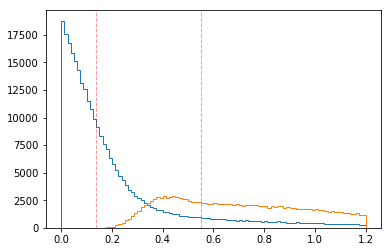

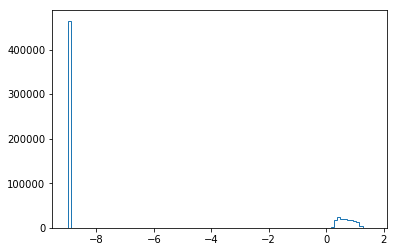

1.199975609779358


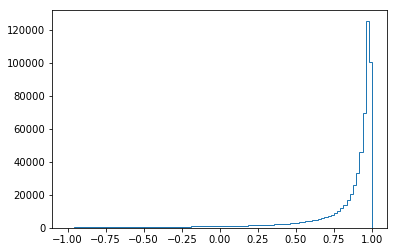

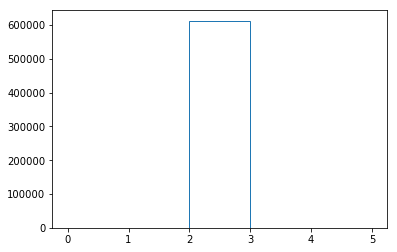

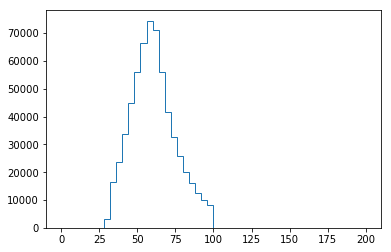

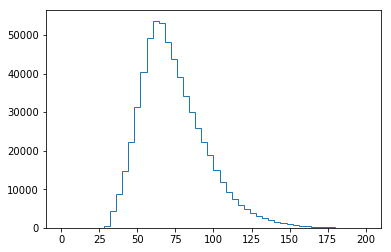

In [46]:
'''
pho_id = 1
selection = (pho['pt'+str(pho_id)] < 34.)\
            & (pho['pt'+str(pho_id)] > 20.)\
            & (pho['sieie'+str(pho_id)] < 0.011)\
            & (pho['bdt'+str(pho_id)] > -0.92)\
            & (pho['bdt'+str(pho_id)] < 0.5)\
            #& (pho['mgg'] < 80.)\
ma = pho['ma'+str(pho_id)][selection]#[selection]
'''#            & (pho['id'] == 1)\
selection = (pho['pt'] > 10.)\
            & (pho['pt'] < 100.)\
            & (pho['nRecoPho'] == 2)
ma = pho['ma'][selection]#[selection]
eta = pho['eta'][selection]
pt = pho['pt'][selection]
pu = pho['pu'][selection]

ma3b3 = pho['ma3b3'][selection]
mafc = pho['mafc'][selection]

nbins = 140#56#28#14056#48
nbins = 120
nbins = 48*2
plt.hist(ma, histtype='step', range=(0., 1.2), bins=nbins)
plt.hist(ma3b3, histtype='step', range=(0., 1.2), bins=nbins)
plt.axvline(x=0.135, color='r', linestyle='dashed', linewidth=1, alpha=0.4)
plt.axvline(x=0.55, color='r', linestyle='dashed', linewidth=1, alpha=0.4)
plt.show()

plt.hist(ma3b3, histtype='step', bins=nbins, range=(-9., 1.6))
plt.show()
print(np.max(ma3b3))

plt.hist(pho['bdt'][selection], histtype='step', range=(-1., 1.), bins=nbins)
plt.show()

plt.hist(pho['nRecoPho'][selection], histtype='step', range=(0., 5.), bins=5)
plt.show()

plt.hist(pt, histtype='step', range=(0., 200.), bins=50)
plt.show()

plt.hist(pho['energy'][selection], histtype='step', range=(0., 200.), bins=50)
plt.show()

226859 241181 145073


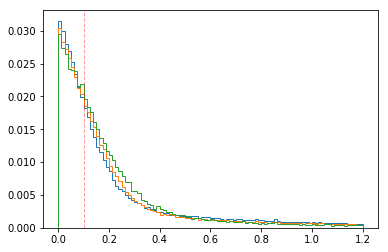

In [47]:
#ma = ma3b3
#ma = mafc
sg = 7.5
ptcut_lo, ptcut_hi = 62.5-sg, 62.5+sg
print(len(pt[pt<ptcut_lo]), len(pt[(pt>ptcut_lo)&(pt<ptcut_hi)]), len(pt[pt>ptcut_hi]))
#plt.hist(ma, histtype='step', range=(0., 1.2), bins=nbins)
plt.hist(ma[pt<ptcut_lo], histtype='step', range=(0., 1.2), bins=nbins, weights=np.ones_like(ma[pt<ptcut_lo])/len(ma[pt<ptcut_lo]))
plt.hist(ma[(pt>ptcut_lo)&(pt<ptcut_hi)], histtype='step', range=(0., 1.2), bins=nbins, weights=np.ones_like(ma[(pt>ptcut_lo)&(pt<ptcut_hi)])/len(ma[(pt>ptcut_lo)&(pt<ptcut_hi)]))
plt.hist(ma[pt>ptcut_hi], histtype='step', range=(0., 1.2), bins=nbins, weights=np.ones_like(ma[pt>ptcut_hi])/len(ma[pt>ptcut_hi]))
#plt.hist(ma[pt>100.], histtype='step', range=(0., 1.2), bins=nbins, weights=np.ones_like(ma[pt>100.])/len(ma[pt>100.]))
plt.axvline(x=0.1, color='r', linestyle='dashed', linewidth=1, alpha=0.4)
#plt.axvline(x=0.55, color='r', linestyle='dashed', linewidth=1, alpha=0.4)
plt.show()

In [36]:
import CMS_lumi, tdrstyle

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
#CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.cmsTextOffset = 0.09
#iPos = 11
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.12+0.03
iPeriod = 0

ma 226859
mamid 241181
mahi 145073
13 TeV
test


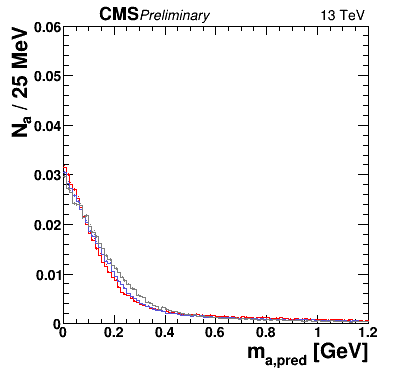

In [48]:
err_style = 'E2'
fill_style = 3002
ROOT.TGaxis.SetMaxDigits(4)

#[pt<ptcut_lo]
#[(pt>ptcut_lo)&(pt<ptcut_hi)]
#[pt>ptcut_hi]
hnbins = 48*2

k = 'ma'
h[k] = ROOT.TH1F(k, k, hnbins, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 60, 0.55-0.2, 0.55+0.25)
c[k] = ROOT.TCanvas(k, k, wd, ht)
count = 0
for m in ma[pt<ptcut_lo]:
    h[k].Fill(m)
    count += 1
print(k,count)
c[k].cd()
#h[k].Scale(1./h[k].Integral())
h[k].Scale(1./h[k].GetEntries())
set_hist(h[k], c[k], "m_{a,pred} [GeV]", "", "")
ymax = 1.2*h[k].GetMaximum()
ymin = 0.8*h[k].GetMinimum()
#ymax = 28000
#ymin = 5000
ymax = 0.06
ymin = 0
h[k].GetYaxis().SetRangeUser(ymin, ymax)
h[k].GetYaxis().SetTitle("N_{a} / 25 MeV")
h[k].GetYaxis().SetTitleOffset(1.1)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
h[k].SetFillColor(2)#14
h[k].SetFillStyle(fill_style)
h[k].Draw("%s"%err_style)
hc[k] = h[k].Clone()
hc[k].SetLineColor(2)#14
hc[k].SetFillStyle(0)
hc[k].Draw("hist same")

###########
'''klo = k+'lo'
h[klo] = ROOT.TH1F(klo, klo, hnbins, 0., 1.2)
count = 0
for m in ma[pt<ptcut_lo]:
    h[klo].Fill(m)
    count += 1
print(klo,count)
h[klo].Scale(1./h[klo].Integral())
h[klo].SetFillColor(2)#14
h[klo].SetFillStyle(fill_style)
h[klo].Draw("%s same"%err_style)
hc[klo] = h[klo].Clone()
hc[klo].SetLineColor(2)#14
hc[klo].SetFillStyle(0)
hc[klo].Draw("hist same")'''

###########
kmid = k+'mid'
h[kmid] = ROOT.TH1F(kmid, kmid, hnbins, 0., 1.2)
count = 0
for m in ma[(pt>ptcut_lo)&(pt<ptcut_hi)]:
    h[kmid].Fill(m)
    count += 1
print(kmid,count)
#h[kmid].Scale(1./h[kmid].Integral())
h[kmid].Scale(1./h[kmid].GetEntries())
h[kmid].SetFillColor(9)#14
h[kmid].SetFillStyle(fill_style)
h[kmid].Draw("%s same"%err_style)
hc[kmid] = h[kmid].Clone()
hc[kmid].SetLineColor(9)#14
hc[kmid].SetFillStyle(0)
hc[kmid].Draw("hist same")

###########
khi = k+'hi'
h[khi] = ROOT.TH1F(khi, khi, hnbins, 0., 1.2)
count = 0
for m in ma[pt>ptcut_hi]:
    h[khi].Fill(m)
    count += 1
print(khi,count)
#h[khi].Scale(1./h[khi].Integral())
h[khi].Scale(1./h[khi].GetEntries())
h[khi].SetFillColor(14)#14
h[khi].SetFillStyle(fill_style)
h[khi].Draw("%s same"%err_style)
hc[khi] = h[khi].Clone()
hc[khi].SetLineColor(14)#14
hc[khi].SetFillStyle(0)
hc[khi].Draw("hist same")

CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
#h[k].GetXaxis().SetRangeUser(0.55-0.15, 0.55+0.15)
#h[k].GetYaxis().SetRangeUser(200, 2200)
c[k].Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chmAvPt135


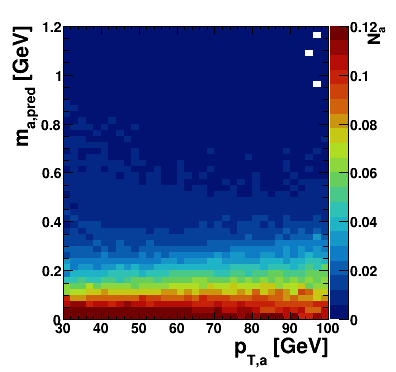

In [49]:
make_2dpdf = True
mass = 0.135
sample = '%d MeV'%mass if mass < 1000 else '%d GeV'%(mass/1000.)
#CMS_lumi.lumi_sqrtS = "m(a) = %s"%sample # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
#CMS_lumi.relPosX = 0.15

k = 'hmAvPt%d'%int(mass*1e3)
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
#h[k] = ROOT.TH2F(k, k, 50, 20., 100., 48, 0., 1.2)
h[k] = ROOT.TH2F(k, k, 35, 30., 100., 48, 0., 1.2)

for m,p in zip(ma,pt):
    #print(m,p)
    h[k].Fill(p, m)
    #break
    
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
h[k], c[k] = set_hist(h[k], c[k], "p_{T,a} [GeV]", "m_{a,pred} [GeV]", "m_{a,pred} vs. p_{T,a}")
#ROOT.gPad.SetTopMargin(0.1)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetRightMargin(0.17)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(1.0)
h[k].GetYaxis().SetTitleSize(0.06)
h[k].GetZaxis().SetTitle('N_{a}')
h[k].GetZaxis().SetTitleOffset(0.9)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
#if make_2dpdf:
#    ROOT.gPad.SetLeftMargin(0.15)
#    ROOT.gPad.SetRightMargin(0.2)
#    h[k].GetZaxis().SetTitle("p(m_{a}|p_{T,a})")
#    h[k].GetZaxis().SetTitleOffset(1.35)
#else:
#    h[k].SetMaximum(60.)
h[k].SetMaximum(0.12)
h[k].Draw("COL Z")
#CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
#if make_2dpdf:
#    palette = h[k].GetListOfFunctions().FindObject("palette")
#    palette.SetX1NDC(0.808)
#    palette.SetX2NDC(0.858)
#palette[k] = h[k].GetListOfFunctions().FindObject("palette")
#palette[k].SetX1NDC(0.84)
#palette[k].SetX2NDC(0.89)
#palette[k].SetY1NDC(0.13)
#palette[k].SetY2NDC(0.9)
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
#if print_pdf: c[k].Print('%s/%sMeV.pdf'%(plot_dir, k))

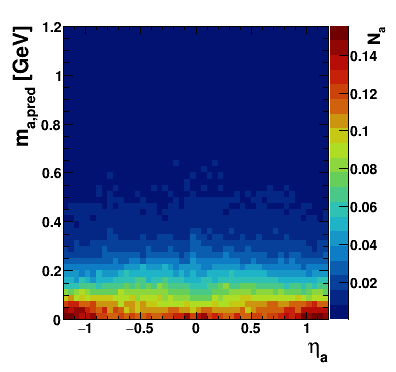

In [50]:
k = 'hmAvEta%d'%int(mass*1e3)
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, 48, -1.2, 1.2, 48, 0., 1.2)

for m,e in zip(ma,eta):
    #print(m,p)
    h[k].Fill(e, m)
    #break

k = 'hmAvEta%d'%int(mass*1e3)
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
h[k], c[k] = set_hist(h[k], c[k], "#eta_{a}", "m_{a,pred} [GeV]", "m_{a,pred} vs. #eta_{a}")
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetRightMargin(0.17)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(1.)
h[k].GetYaxis().SetTitleSize(0.06)
h[k].GetZaxis().SetTitle('N_{a}')
h[k].GetZaxis().SetTitleOffset(0.9)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
'''
if make_2dpdf:
    ROOT.gPad.SetLeftMargin(0.15)
    ROOT.gPad.SetRightMargin(0.2)
    h[k].GetZaxis().SetTitle("p(m_{a}|#eta_{a})")
    h[k].GetZaxis().SetTitleOffset(1.35)
else:
    h[k].SetMaximum(60.)
'''
h[k].Draw("COL Z")
#CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
#if make_2dpdf:
#    palette = h[k].GetListOfFunctions().FindObject("palette")
#    palette.SetX1NDC(0.808)
#    palette.SetX2NDC(0.858)
#palette[k] = h[k].GetListOfFunctions().FindObject("palette")
#palette[k].SetX1NDC(0.84)
#palette[k].SetX2NDC(0.89)
#palette[k].SetY1NDC(0.12)
#palette[k].SetY2NDC(0.9)
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
#if print_pdf: c[k].Print('%s/%sMeV.pdf'%(plot_dir, k))

In [40]:
k = 'hmAvPU%d'%int(mass*1e3)
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, 50, 15, 40, 48, 0., 1.2)

print(np.min(pu[pu>0.]), np.max(pu))
for m,p in zip(ma,pu):
    #print(m,p)
    h[k].Fill(p, m)
    #break

k = 'hmAvPU%d'%int(mass*1e3)
print(k)
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
h[k], c[k] = set_hist(h[k], c[k], "PU", "m_{a,pred} [GeV]", "m_{a,pred} vs. PU")
#ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.2)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(1.0)
h[k].GetYaxis().SetTitleSize(0.06)
h[k].GetZaxis().SetTitle("p(m_{a}|PU)" if make_2dpdf else 'N_{a}')
h[k].GetZaxis().SetTitleOffset(1.35)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.8)
h[k].GetXaxis().SetTitleSize(0.06)
h[k].Draw("COL Z")
#h[k].SetMaximum(70.)
#CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
#palette = h[k].GetListOfFunctions().FindObject("palette")
#palette.SetX1NDC(0.808)
#palette.SetX2NDC(0.858)
#palette.SetY1NDC(0.13)
#palette.SetY2NDC(0.9)

#c[k].SetGrid()
#c[k].Draw()
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
#if print_pdf: c[k].Print('%s/%sMeV.pdf'%(plot_dir, k))
plt.hist(pu)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity